# Import Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the data and understand it

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


#### customerID in not an important feature so let's drop it

In [10]:
data.drop('customerID', axis=1, inplace=True)

In [11]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Let's visualize the correlation matrix to identify any linear relationships between our numerical features.

In [96]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

numeric_data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


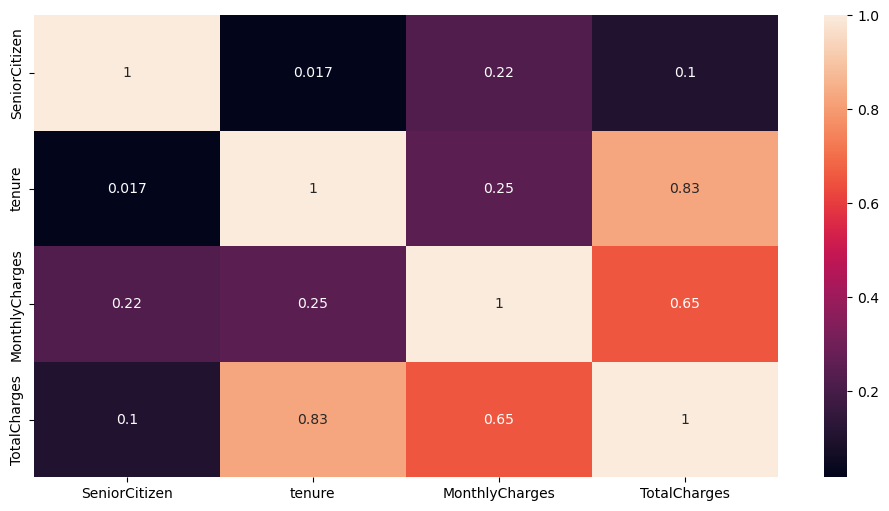

In [97]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

### Summary:
* `tenure` and `TotalCharges` show a strong positive correlation, suggesting that longer tenure is associated with higher total charges.
* `MonthlyCharges` and `TotalCharges` also show a moderate to strong positive correlation, indicating that higher monthly charges tend to contribute to higher total charges.
* `SeniorCitizen` has very weak correlations with all `other variables`, suggesting that being a senior citizen has little to no relationship with tenure, MonthlyCharges, or TotalCharges.

### As you know, to train a model, we need all features to be numerical. So, let's identify which features are categorical and transform them into numerical format.

In [13]:
non_numeric_cols = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object' ]

In [14]:
non_numeric_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [15]:
for column in non_numeric_cols : 
    print(f'{column}: {data[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


#### Before proceeding, let's first address the TotalCharges column by filling the NaN values with the median.

In [23]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [24]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
TotalChargws        float64
dtype: object

In [25]:
data.drop('TotalChargws', axis=1, inplace=True)

In [30]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

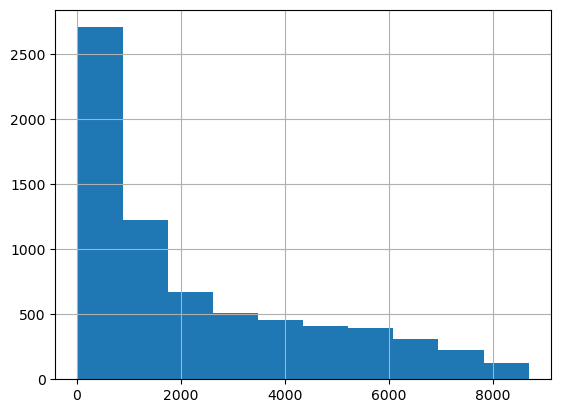

In [31]:
data['TotalCharges'].hist()

In [32]:
total_charges_median = data['TotalCharges'].median()
data['TotalCharges'] = data['TotalCharges'].fillna(total_charges_median)

In [33]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### let's first address the Churn column by making it numerical.

In [29]:
data[data['Churn'] == 'Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [35]:
data['Churn'] = (data['Churn'] == 'Yes').astype(int)

In [36]:
data.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

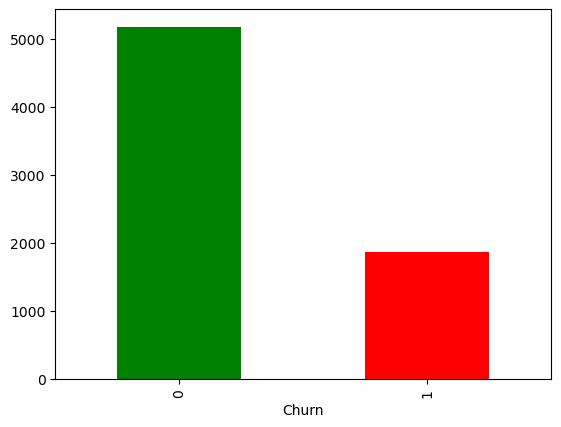

In [44]:
data['Churn'].value_counts().plot(kind="bar", color=['green', 'red'])

In [59]:
non_numeric_cols = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object' ]

In [60]:
non_numeric_cols 

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [61]:
for column in non_numeric_cols : 
    print(f'{column}: {data[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


#### the `No` category appears in multiple features, so performed a transformation to handle the repetition of the `No` category across different features. 

In [62]:
data['MultipleLines'] = data['MultipleLines'].apply(lambda x:'MultipleLines_'+x)
data['InternetService'] = data['InternetService'].apply(lambda x:'InternetService_'+x)
data['OnlineSecurity'] = data['OnlineSecurity'].apply(lambda x:'OnlineSecurity_'+x)
data['OnlineBackup'] = data['OnlineBackup'].apply(lambda x:'OnlineBackup_'+x)
data['DeviceProtection'] = data['DeviceProtection'].apply(lambda x:'DeviceProtection_'+x)
data['TechSupport'] = data['TechSupport'].apply(lambda x:'TechSupport_'+x)
data['StreamingTV'] = data['StreamingTV'].apply(lambda x:'StreamingTV_'+x)
data['StreamingMovies'] = data['StreamingMovies'].apply(lambda x:'StreamingMovies_'+x)

In [63]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,MultipleLines_No phone service,InternetService_DSL,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,MultipleLines_No,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_Yes,TechSupport_No,StreamingTV_No,StreamingMovies_No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,MultipleLines_No,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,MultipleLines_No phone service,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_No,StreamingMovies_No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,MultipleLines_No,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,MultipleLines_Yes,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_No,StreamingTV_Yes,StreamingMovies_Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,MultipleLines_No phone service,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [64]:
dumies = pd.concat([
    pd.get_dummies(data['MultipleLines']),
    pd.get_dummies(data['InternetService']),
    pd.get_dummies(data['OnlineSecurity']),
    pd.get_dummies(data['OnlineBackup']),
    pd.get_dummies(data['DeviceProtection']),
    pd.get_dummies(data['TechSupport']),
    pd.get_dummies(data['StreamingTV']),
    pd.get_dummies(data['StreamingMovies'])
], axis=1)

In [65]:
dumies

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,False,True,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,True,False,False,True,False,False,False,False,True,True,...,True,True,False,False,True,False,False,True,False,False
2,True,False,False,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
3,False,True,False,True,False,False,False,False,True,True,...,True,False,False,True,True,False,False,True,False,False
4,True,False,False,False,True,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,True,True,False,False,False,False,True,True,...,True,False,False,True,False,False,True,False,False,True
7039,False,False,True,False,True,False,True,False,False,False,...,True,True,False,False,False,False,True,False,False,True
7040,False,True,False,True,False,False,False,False,True,True,...,False,True,False,False,True,False,False,True,False,False
7041,False,False,True,False,True,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [66]:
 data = pd.concat([data, dumies], axis=1)

In [67]:
 data.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

In [68]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,...,False,True,False,False,True,False,False,True,False,False
1,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,...,True,True,False,False,True,False,False,True,False,False
2,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,...,False,True,False,False,True,False,False,True,False,False
3,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,...,True,False,False,True,True,False,False,True,False,False
4,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,...,True,False,False,True,False,False,True,False,False,True
7039,Female,0,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,...,True,True,False,False,False,False,True,False,False,True
7040,Female,0,Yes,Yes,11,No,Month-to-month,Yes,Electronic check,29.60,...,False,True,False,False,True,False,False,True,False,False
7041,Male,1,Yes,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,...,False,True,False,False,True,False,False,True,False,False


#### Now transform other columns

In [69]:
non_numeric_cols = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object' ]
non_numeric_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [71]:
encoder = LabelEncoder()

for column in non_numeric_cols:
    data[column] = encoder.fit_transform(data[column])

In [72]:
data.dtypes

gender                                    int32
SeniorCitizen                             int64
Partner                                   int32
Dependents                                int32
tenure                                    int64
PhoneService                              int32
Contract                                  int32
PaperlessBilling                          int32
PaymentMethod                             int32
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int32
MultipleLines_No                           bool
MultipleLines_No phone service             bool
MultipleLines_Yes                          bool
InternetService_DSL                        bool
InternetService_Fiber optic                bool
InternetService_No                         bool
OnlineSecurity_No                          bool
OnlineSecurity_No internet service         bool
OnlineSecurity_Yes                      

# Modeling

In [73]:
x = data.drop("Churn", axis=1)
y = data['Churn']

# split data into train and test set 

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Now we're going to try 3 different ML models
* Logistic regressin
* K-Nearest Neighbor Classifeir
* Random Forest Classifier

In [74]:
models = {
    "Logistic Regression" : LogisticRegression(max_iter = 10000),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" :  RandomForestClassifier() 
}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items() : 
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8168914123491838,
 'KNN': 0.7757274662881476,
 'Random Forest': 0.7998580553584103}

<Axes: >

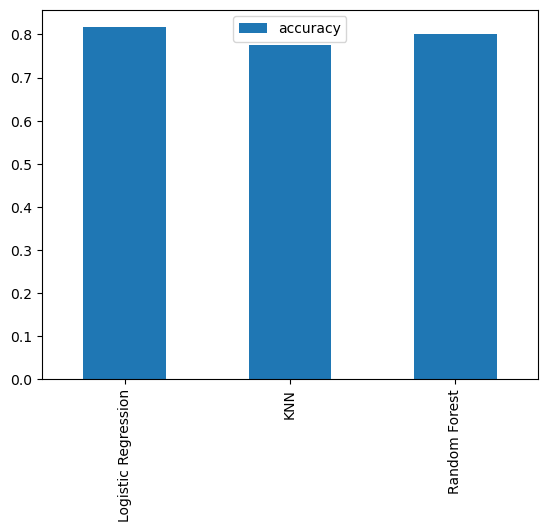

In [76]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar()

We observe from the baseline that Logistic Regression is the best.

 Now we've got a baseline, so let's try to improve it 

 Let's look at the following : 
 * Hyperparameter tuning

# Let's try hyperparameter tuning for KNN

In [78]:
train_scores = []
test_scores = [] 

n_neighbors = range(1, 21)
for neighbor in n_neighbors: 
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

Mximum KNN scores on the test data: 79.63%


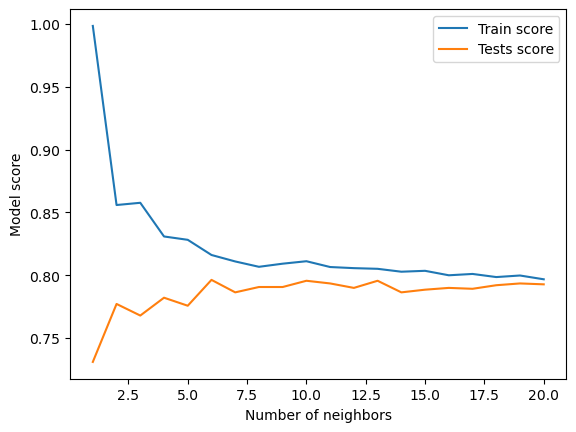

In [79]:
plt.plot(n_neighbors, train_scores, label = "Train score")
plt.plot(n_neighbors, test_scores, label = "Tests score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Mximum KNN scores on the test data: {max(test_scores)*100:.2f}%")

### Even after improving KNN, it is still below our Logistic Regression, so we are going to discard the KNN model.

#### Let's tune our Random Forest

In [81]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [82]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(1,20,2)}

In [85]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv = 5,
                               n_iter = 20, 
                               verbose = True)

rs_rf.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\Desktop\Customer-Churn-predicetion\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\Desktop\Customer-Churn-predicetion\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\Desktop\Customer-Churn-predicetion\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\Desktop\Customer-Churn-predicetion\env\Lib\site-packages\sklearn\base.py", line 666, in _

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [86]:
rs_rf.best_params_

{'n_estimators': 810, 'min_samples_split': 9, 'max_depth': 10}

In [87]:
rs_rf.score(x_test, y_test)

0.8105039034776437

In [89]:
model_scores

{'Logistic Regression': 0.8168914123491838,
 'KNN': 0.7757274662881476,
 'Random Forest': 0.7998580553584103}

### Still Bellow Logistic Regression, so we are going to discard the Random Forest model.

#### Let's tune our Logistic Regressino

In [90]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [91]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

In [92]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20, 
                               verbose = True)

# Fit Random hyperparameter search model for logistic regression

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [93]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.004832930238571752}

In [94]:
rs_log_reg.score(x_test, y_test)

0.815471965933286

In [95]:
model_scores

{'Logistic Regression': 0.8168914123491838,
 'KNN': 0.7757274662881476,
 'Random Forest': 0.7998580553584103}

# Result : 
* After hyperparameter tuning our three models (KNN, Logistic Regression, and Random Forest) using RandomizedSearchCV, we observe that the best model remains the baseline Logistic Regression.

# Future insights

1 - Explore Advanced Models: Since Logistic Regression performed best, you might explore more advanced models or algorithms that could potentially improve performance, such as Gradient Boosting Machines (GBM) or XGBoost.

2 - Feature Engineering: Delve deeper into feature engineering to create new features or refine existing ones, which might help improve model performance across all algorithms.

3 - Model Ensembling: Consider ensembling methods like stacking, bagging, or boosting to combine the strengths of different models and potentially achieve better results than any single model alone.

4 - Cross-Validation: Implement more robust cross-validation techniques to ensure that model performance is consistent and reliable across different subsets of your data.